In [0]:
# Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. 
# Each example is a 28x28 grayscale image, associated with a label from 10 classes.


'''Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot '''

# for further assistance https://www.kaggle.com/zalando-research/fashionmnist

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(60000,)


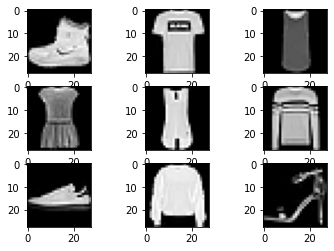

In [0]:
# Display the dataset
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, train_labels.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [0]:

from tensorflow.keras import layers
from tensorflow.keras import models


In [0]:
#Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [0]:
#Load the Data
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
train_images.shape 

(60000, 28, 28)

In [0]:
#Convert image to One channel

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [0]:
train_images.shape,test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
#convert labels to one_hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
#compile the model
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 48s 51ms/step - loss: 0.5323 - accuracy: 0.8032
Epoch 2/5
938/938 [==============================] - 48s 52ms/step - loss: 0.3269 - accuracy: 0.8799
Epoch 3/5
938/938 [==============================] - 48s 51ms/step - loss: 0.2775 - accuracy: 0.8976
Epoch 4/5
938/938 [==============================] - 49s 52ms/step - loss: 0.2472 - accuracy: 0.9080
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 0.2235 - accuracy: 0.9170


In [0]:
#Evaluate the model

score = model.evaluate(train_images, train_labels, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1])

loss= 0.21021386981010437
accuracy= 0.9227499961853027


In [0]:
#single Value predication in number
import numpy as np
predictions = model.predict(test_images)
print(np.argmax(np.round(predictions[10])))



4


In [0]:
#single Value predication in graph (plot)
# load again dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


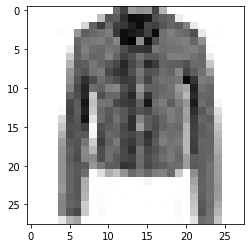

In [0]:
# Display the 4th digit image
digit = test_images[10]
import matplotlib.pyplot as plt
plt.imshow(digit , cmap=plt.cm.binary)
plt.show()